In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import log, sqrt, exp
from scipy.stats import norm

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df_sita=pd.read_excel('合并_关键词得分汇总.xlsx')
df_rate=pd.read_excel('三年期国债收益率.xlsx')
df_total=pd.read_csv('EV2&MV&PB&TotalAsset.csv')

#BS函数
def BS(v_0,sigma,T,K,r):
    
    #单利转复利
    R=(1+T*r)**(1/T)-1
    d1 = (log(v_0/K) + (R + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    call_price = v_0 * norm.cdf(d1) - K * exp(-R * T) * norm.cdf(d2)
    #put_price = K * exp(-r * T) * norm.cdf(-d2) - v_0 * norm.cdf(-d1)
    #print(v_0,sigma,T,K,r)
    print('数据资产价格为{},d1为{},N(d1)为{},d2为{},N(d2)为{}'.format(call_price,d1,norm.cdf(d1),d2,norm.cdf(d2)))
    return call_price,K * exp(-R * T),norm.cdf(d1),norm.cdf(d2)


In [5]:
df_rate['rate_3'].values[-1]

0.0119

In [6]:

#读取sita
sl=df_sita[df_sita['stock_id']==2594]['关键词得分(%)_总和'].values
print(sl)
extended_sl = np.concatenate([
    #np.array([0.04825724, 0.04825724, 0.04825724]),  # 前面添加的3个值
    sl,                            # 原始数组
    np.array([0.040869227149405])                # 末尾添加的1个值
])
print(extended_sl)
s=df_total.loc[df_total["asharevalue_stat_symbol"] == "002594.SZ"][-11:]["asharevalue_ev2"].values
q=pd.DataFrame(s,columns=['EV2'])
q



[0.04825724 0.04507937 0.04778014 0.04867326 0.04570257 0.03680107
 0.04315211 0.04357814 0.03171501 0.04254683]
[0.04825724 0.04507937 0.04778014 0.04867326 0.04570257 0.03680107
 0.04315211 0.04357814 0.03171501 0.04254683 0.04086923]


,EV2
0,1.066713e+11
1,1.679893e+11
2,1.540533e+11
3,2.189324e+11
4,1.814129e+11
5,1.820087e+11
6,5.572521e+11
7,7.341925e+11
8,6.398386e+11
9,5.443586e+11


In [3]:
s=df_total.loc[df_total["asharevalue_stat_symbol"] == "002594.SZ"][-11:]["asharevalue_ev2"].values
q=pd.DataFrame(s,columns=['EV2'])
q

NameError: name 'df_total' is not defined

In [21]:
df_total.loc[df_total["asharevalue_stat_symbol"] == "002594.SZ"][-11:]["asharevalue_ev2"]

13495    1.066713e+11
16081    1.679893e+11
18882    1.540533e+11
21905    2.189324e+11
25364    1.814129e+11
28919    1.820087e+11
32659    5.572521e+11
36700    7.341925e+11
41325    6.398386e+11
46228    5.443586e+11
51301    7.694353e+11
Name: asharevalue_ev2, dtype: float64

In [ ]:
def caculate_sita(symbol,yaer_num):
    sita = (df_total.loc[df_total["asharevalue_stat_symbol"] == symbol][-(yaer_num):]["balance_stat_total_assets"]).pct_change().mean()
    return sita
caculate_sita("002594.SZ",9)

0.25287420705175784

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import log, sqrt, exp
from scipy.stats import norm
from arima import predict_arima

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df_sita=pd.read_excel('合并_关键词得分汇总.xlsx')
df_rate=pd.read_excel('三年期国债收益率.xlsx')
df_total=pd.read_csv('EV2&MV&PB&TotalAsset.csv')

#BS函数
def BS(v_0,sigma,T,K,r):
    
    #单利转复利
    R=(1+T*r)**(1/T)-1
    d1 = (log(v_0/K) + (R + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    call_price = v_0 * norm.cdf(d1) - K * exp(-R * T) * norm.cdf(d2)
    #print('数据资产价格为{},d1为{},N(d1)为{},d2为{},N(d2)为{}'.format(call_price,d1,norm.cdf(d1),d2,norm.cdf(d2)))
    return call_price,K * exp(-R * T),norm.cdf(d1),norm.cdf(d2)

def caculate_sigma(symbol,yaer_num):
    sigma = (df_total.loc[df_total["asharevalue_stat_symbol"] == symbol][-(yaer_num):]["balance_stat_total_assets"]).pct_change().mean()
    return sigma

#返回K的时间序列
def caculate_K(symbol,yaer_num):
    return predict_arima(p=5,d=1,q=6,T=3,symbol="002594.SZ",yaer_num=11)


def main_bs(symbol,yaer_num):
    v_0 = df_total.loc[df_total["asharevalue_stat_symbol"] == symbol][-(yaer_num):]["asharevalue_ev2"].values
    sigma = caculate_sigma(symbol,yaer_num)
    K_series = caculate_K(symbol,yaer_num)
    r = df_rate['rate_3'].values
    bs_results = []
    for i in range(yaer_num):
        bs_result = BS(v_0[i],sigma,3,K_series[i+3],r[i])
        bs_results.append(bs_result[0])
    print(v_0[-1])
    return bs_results


c:\Users\eureka\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\eureka\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[1.01523601e+11 1.60416481e+11 1.46692638e+11 2.08276251e+11
 1.73121891e+11 1.75310627e+11 5.33205517e+11 7.02197761e+11
 6.19546124e+11 5.21197847e+11 7.37989089e+11 9.35197436e+11
 9.21007170e+11 9.62275135e+11]


In [43]:
a = main_bs(symbol="002594.SZ",yaer_num=11)

c:\Users\eureka\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


数据资产价格为2669719124.148264,d1为-1.0986926126044088,N(d1)为0.13595108295524644,d2为-1.5330266571945221,N(d2)为0.06263464347661798
数据资产价格为32056534326.101257,d1为0.3196980605642119,N(d1)为0.6254013849328302,d2为-0.11463598402590142,N(d2)为0.4543668282931039
数据资产价格为23524177338.944878,d1为0.10712972421310082,N(d1)为0.5426569668275769,d2为-0.3272043203770125,N(d2)为0.37175667670125895
数据资产价格为1981666910.0660744,d1为-1.5804798443205965,N(d1)为0.05699850958470205,d2为-2.0148138889107097,N(d2)为0.02196207661402936
数据资产价格为72800005.58157015,d1为-2.7061555768175256,N(d1)为0.00340335745970306,d2为-3.1404896214076388,N(d2)为0.0008433284181021997
数据资产价格为178889576.7517619,d1为-2.419448302494872,N(d1)为0.007772035032149015,d2为-2.853782347084985,N(d2)为0.0021601059352735507
数据资产价格为132901583301.54788,d1为0.5607010341974592,N(d1)为0.7124993189684196,d2为0.12636698960734588,N(d2)为0.5502792844381003
数据资产价格为147316942986.99707,d1为0.37119064293026505,N(d1)为0.6447522290275974,d2为-0.06314340165984828,N(d2)为0.47482615685289226
数据资产价格为4481463

c:\Users\eureka\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
mask = df_total["asharevalue_stat_symbol"] == "002594.SZ"
last11 = df_total.loc[mask].tail(11)

# 优先使用年份或报告日期
if "stat_year" in last11.columns:
    years = last11["stat_year"].values
elif "asharevalue_stat_reportdate" in last11.columns:
    years = pd.to_datetime(last11["asharevalue_stat_reportdate"]).dt.year.values
else:
    years = np.arange(1, len(a) + 1)

out = pd.DataFrame({'year': years, 'bs_price': a})
out.to_csv('bs_prices_002594_with_year.csv', index=False, encoding='utf-8-sig')

c:\Users\eureka\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\eureka\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\eureka\AppData\Local\Temp\ipykernel_9256\3963654862.py:29: UserWarning: Glyph 20272 (\N{CJK UNIFIED IDEOGRAPH-4F30}) missing from font(s) DejaVu Serif.
  plt.tight_layout()
C:\Users\eureka\AppData\Local\Temp\ipykernel_9256\3963654862.py:29: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Serif.
  plt.tight_layout()
C:\Users\eureka\AppData\Local\Temp\ipykernel_9256\3963654862.py:29: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PA

数据资产价格为2669719124.148264,d1为-1.0986926126044088,N(d1)为0.13595108295524644,d2为-1.5330266571945221,N(d2)为0.06263464347661798
数据资产价格为32056534326.101257,d1为0.3196980605642119,N(d1)为0.6254013849328302,d2为-0.11463598402590142,N(d2)为0.4543668282931039
数据资产价格为23524177338.944878,d1为0.10712972421310082,N(d1)为0.5426569668275769,d2为-0.3272043203770125,N(d2)为0.37175667670125895
数据资产价格为1981666910.0660744,d1为-1.5804798443205965,N(d1)为0.05699850958470205,d2为-2.0148138889107097,N(d2)为0.02196207661402936
数据资产价格为72800005.58157015,d1为-2.7061555768175256,N(d1)为0.00340335745970306,d2为-3.1404896214076388,N(d2)为0.0008433284181021997
数据资产价格为178889576.7517619,d1为-2.419448302494872,N(d1)为0.007772035032149015,d2为-2.853782347084985,N(d2)为0.0021601059352735507
数据资产价格为132901583301.54788,d1为0.5607010341974592,N(d1)为0.7124993189684196,d2为0.12636698960734588,N(d2)为0.5502792844381003
数据资产价格为147316942986.99707,d1为0.37119064293026505,N(d1)为0.6447522290275974,d2为-0.06314340165984828,N(d2)为0.47482615685289226
数据资产价格为4481463

C:\Users\eureka\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20272 (\N{CJK UNIFIED IDEOGRAPH-4F30}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\eureka\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\eureka\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\eureka\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36817 (\N{CJK UNIFIED IDEOGRAPH-8FD1}) missing from font(s) DejaVu Serif.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\eureka\AppData\Roaming\Python\Python312\site-packages\IPython\core\pyla

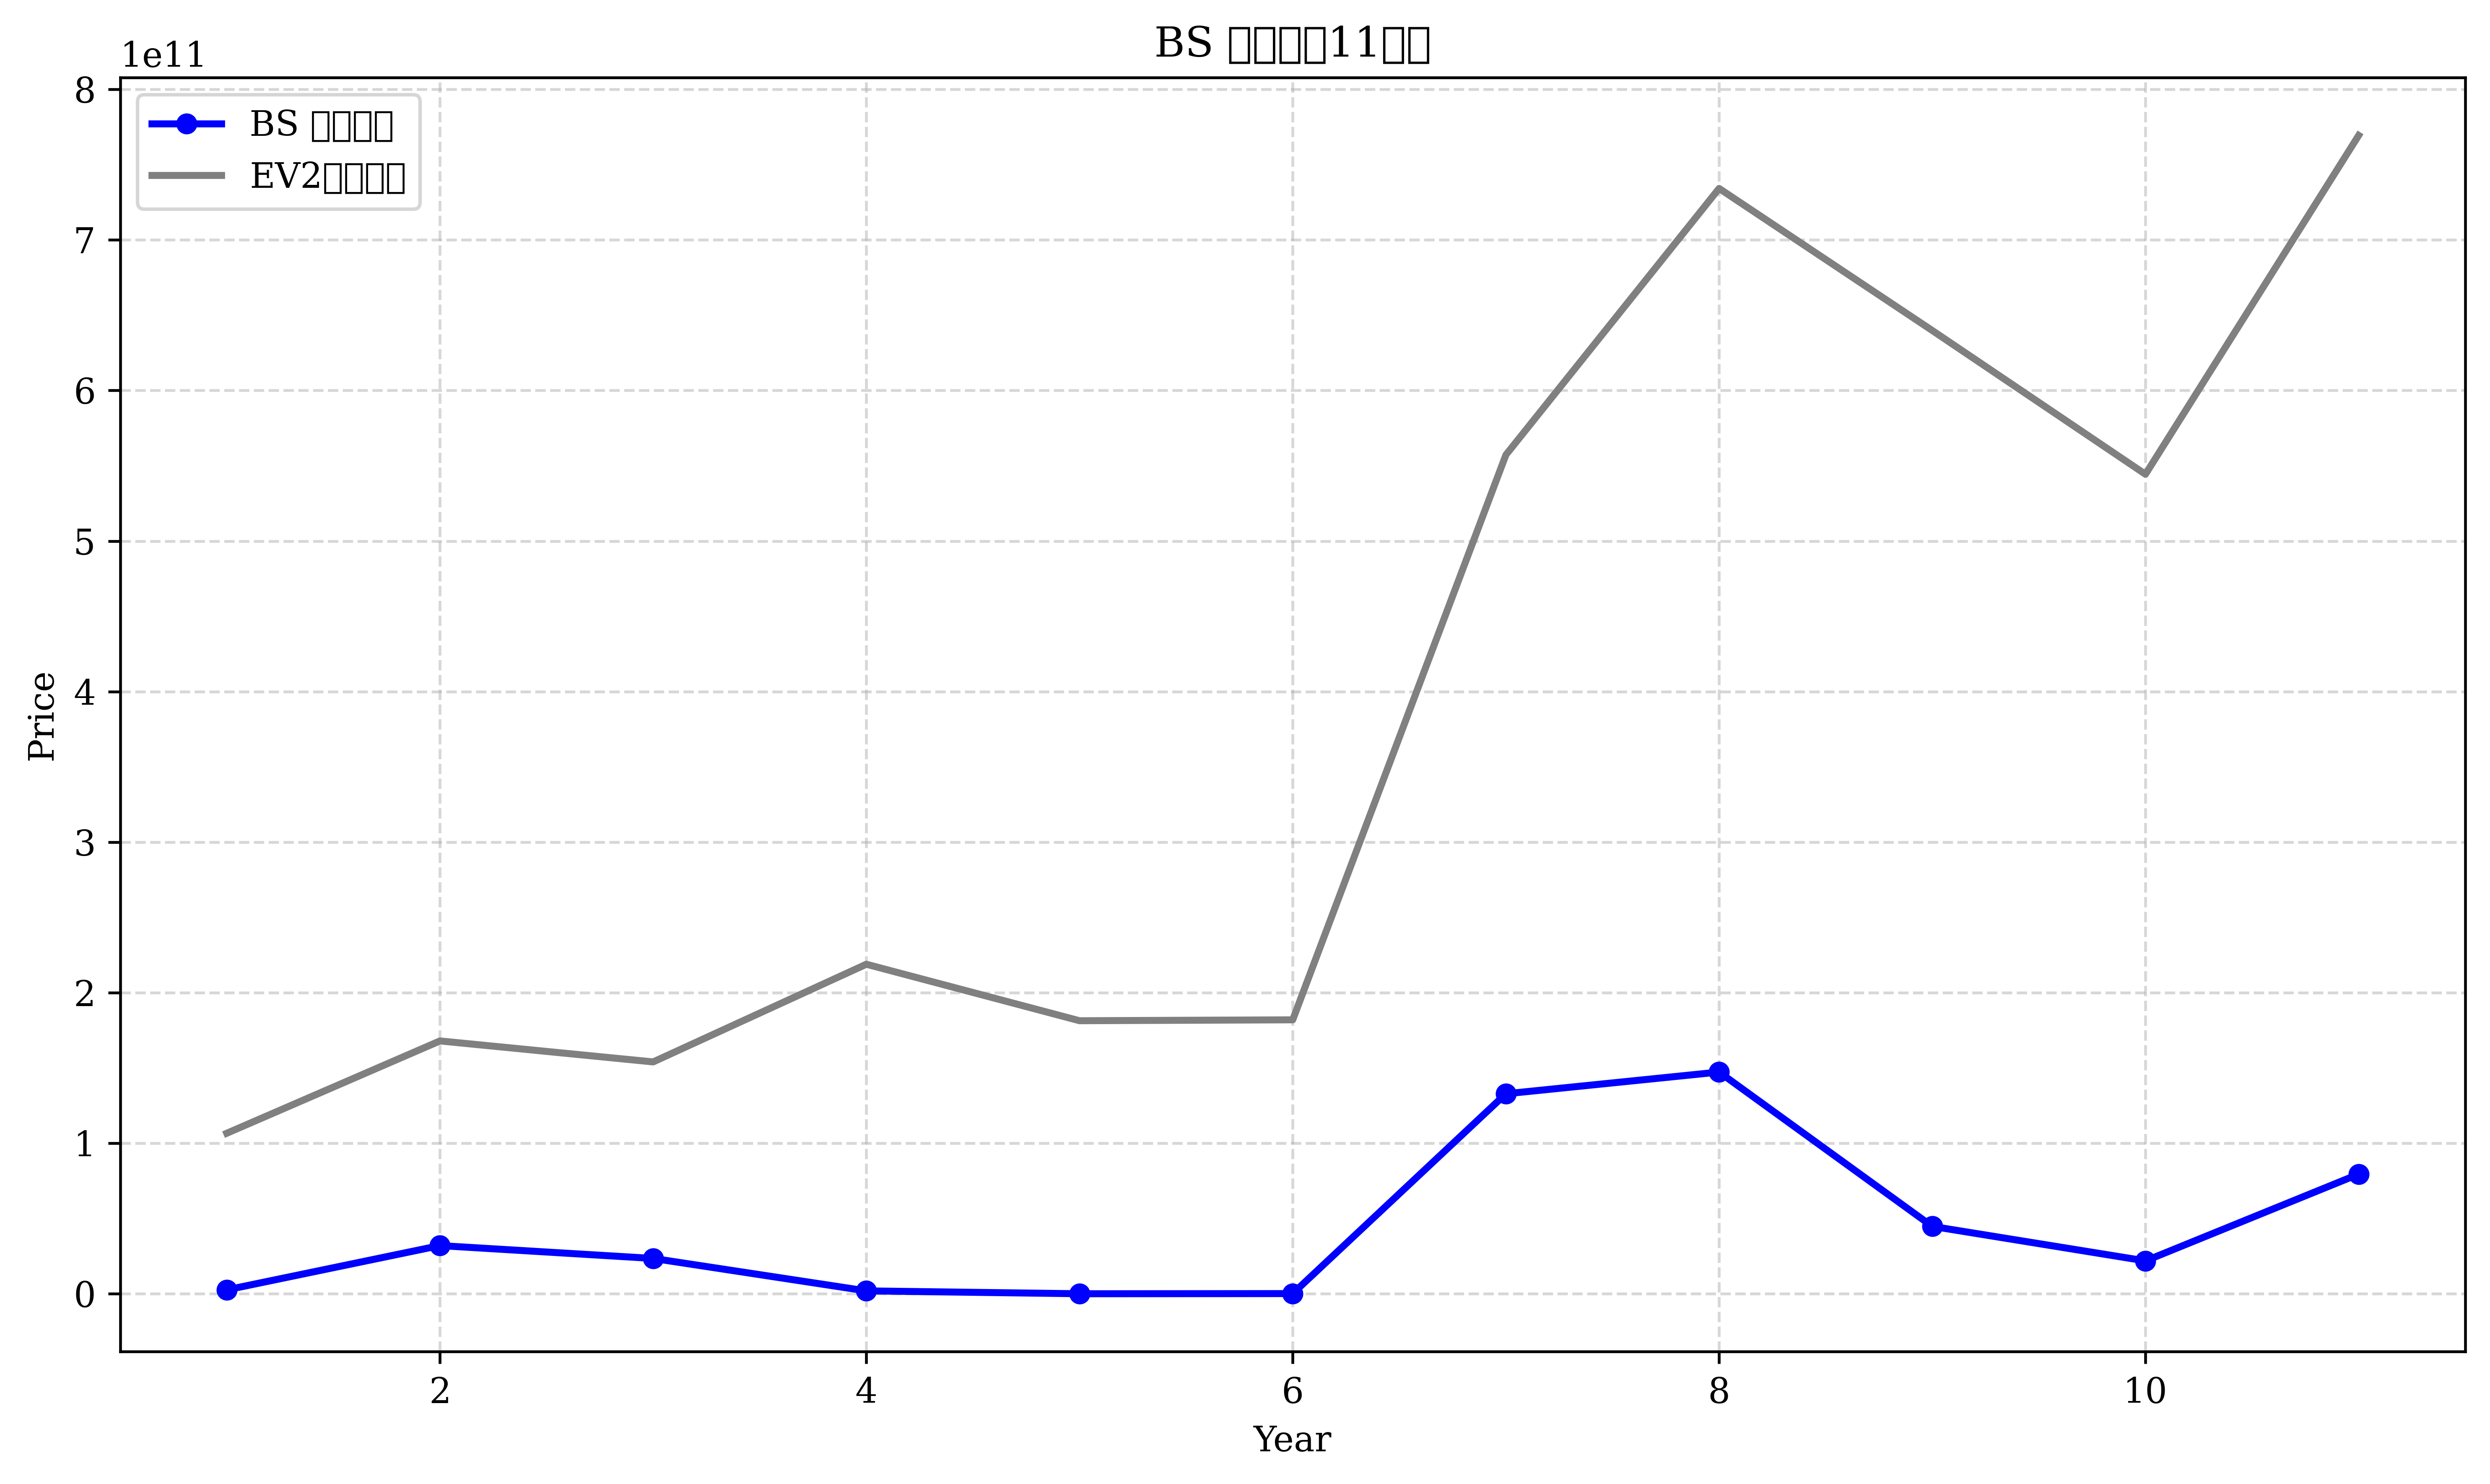

In [42]:
# 计算 BS 结果
bs_vals = main_bs(symbol="002594.SZ", yaer_num=11)

# 取对应的 11 期原始数据（用于年份和对比）
mask = df_total["asharevalue_stat_symbol"] == "002594.SZ"
last11 = df_total.loc[mask].tail(11)

# 优先使用年份/日期列；否则用索引编号
if "stat_year" in last11.columns:
    x = last11["stat_year"].values
elif "asharevalue_stat_reportdate" in last11.columns:
    x = pd.to_datetime(last11["asharevalue_stat_reportdate"]).dt.year.values
else:
    x = np.arange(1, len(bs_vals) + 1)

# 可选：叠加原始 EV2 进行对比
ev2_vals = last11["asharevalue_ev2"].values if "asharevalue_ev2" in last11.columns else None

plt.figure(figsize=(10, 6), dpi=600)
plt.plot(x, bs_vals, 'b-o', label='BS 理论价格', linewidth=2, markersize=5)
if ev2_vals is not None:
    plt.plot(x, ev2_vals, 'gray', label='EV2（现值）', linewidth=2)

plt.title('BS 估值（近11期）')
plt.xlabel('Year' if isinstance(x[0], (np.integer, int)) else 'Index')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()